Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


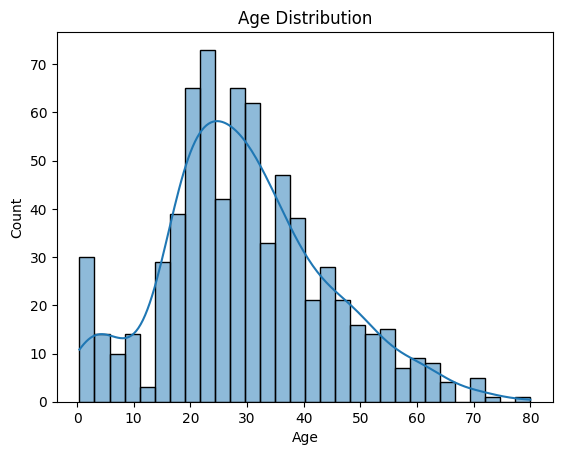

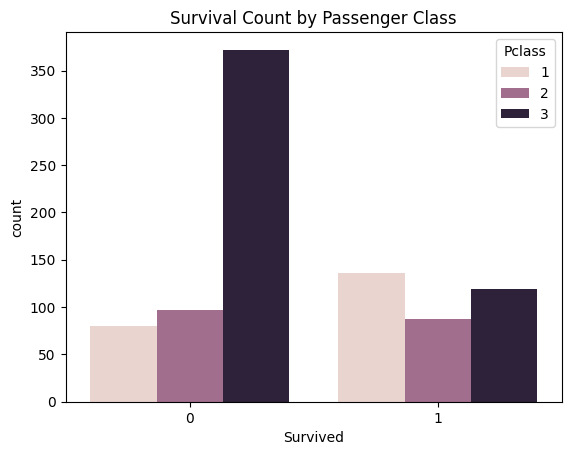

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


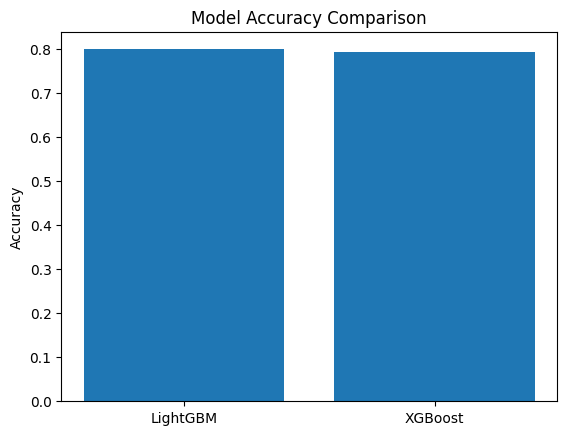

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Step 1: Load the Data
# Step 1: Load the Data
train_data = pd.read_csv('/content/Titanic_train.csv')  # Use read_csv for CSV files
test_data = pd.read_csv('/content/Titanic_test.csv')    # Use read_csv for CSV files

# Step 2: Exploratory Data Analysis (EDA)
def eda(data):
    print("Missing Values:\n", data.isnull().sum())
    sns.histplot(data['Age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.show()
    sns.countplot(data=data, x='Survived', hue='Pclass')
    plt.title('Survival Count by Passenger Class')
    plt.show()

eda(train_data)

# Step 3: Data Preprocessing
def preprocess(data):
    # Fill missing values
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


    # Drop columns that won't be used
    data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

    # One-hot encoding for categorical variables
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    return data

train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Step 4: Split the Data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Predictive Models
# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_val)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)

# Step 6: Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

evaluate_model(y_val, lgbm_pred, "LightGBM")
evaluate_model(y_val, xgb_pred, "XGBoost")

# Step 7: Compare Performance
# For visualization (optional)
models = ['LightGBM', 'XGBoost']
accuracy_scores = [accuracy_score(y_val, lgbm_pred), accuracy_score(y_val, xgb_pred)]

plt.bar(models, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')